<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Deep_Learning/7_CNN_CIFAR(Improved).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Before\nx_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)
y_train, y_test = y_train.flatten(), y_test.flatten()
print("After\nx_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
Before
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000, 1)
After
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 24s 8ms/step - loss: 1.3126 - accuracy: 0.5462 - val_loss: 1.0421 - val_accuracy: 0.6310
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8525 - accuracy: 0.7024 - val_loss: 0.9523 - val_accuracy: 0.6826
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6993 - accuracy: 0.7596 - val_loss: 0.6955 - val_accuracy: 0.7642
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5904 - accuracy: 0.7969 - val_loss: 0.6681 - val_accuracy: 0.7789
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5099 - accuracy: 0.8237 - val_loss: 0.6555 - val_accuracy: 0.7848
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4318 - accuracy: 0.8519 - val_loss: 0.6194 - val_accuracy: 0.7987
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3704 - accuracy: 0.8718 - val_loss: 0.6337 - val_ac

**Observation:** Since the accuracy is around 98% and the validation accuracy is 83%, we can say the model is overfitted.

In [ ]:
x_train.shape[0]

50000

In [ ]:
x_train.shape[0] // 32

1562

In [12]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1562/1562 [==============================] - 32s 20ms/step - loss: 0.5548 - accuracy: 0.8224 - val_loss: 0.5518 - val_accuracy: 0.8266
Epoch 2/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.4539 - accuracy: 0.8497 - val_loss: 0.4724 - val_accuracy: 0.8450
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.4141 - accuracy: 0.8618 - val_loss: 0.5210 - val_accuracy: 0.8387
Epoch 4/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.3932 - accuracy: 0.8685 - val_loss: 0.5075 - val_accuracy: 0.8368
Epoch 5/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.3788 - accuracy: 0.8719 - val_loss: 0.4520 - val_accuracy: 0.8568
Epoch 6/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3618 - accuracy: 0.8789 - val_loss: 0.4482 - val_accuracy: 0.8589
Epoch 7/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3480 - accuracy: 0.8836 - val_loss: 0.4421 - val_accura

**Observation:** We are getting a lower accuracy but a higher Validation accuracy. Hence, there is lesser Overfitting. Therefore, the model has improved.

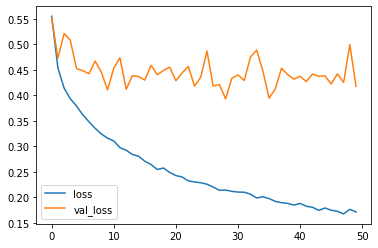

In [13]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

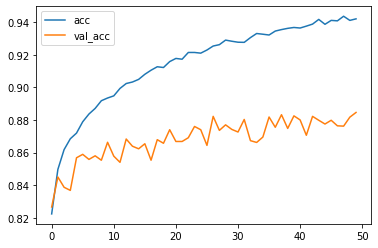

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[912  12  19  10   7   0   4   3  20  13]
 [  3 961   0   3   1   0   0   0   9  23]
 [ 32   3 821  32  46  25  23   7   3   8]
 [ 10   1  21 779  46  86  30  11   5  11]
 [  2   2  19  21 908  16  16  14   1   1]
 [  5   2  24 115  25 800   7  16   3   3]
 [  6   4  26  43  13   6 898   0   1   3]
 [ 10   2  10  15  24  17   4 914   1   3]
 [ 35  16   3   0   1   1   0   5 929  10]
 [  7  45   2   6   0   1   1   3  11 924]]


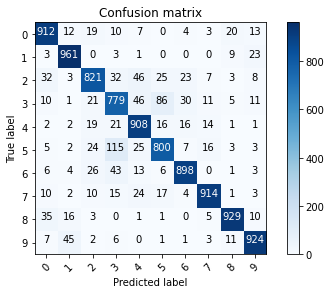

In [15]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



**Observation:** 
Much lesser misclassifications as promised before.


Lets check the two most wrong predictions.

a. True Label = 5, Predicted Label = 3, Value = 119

b. True Label = 3, Predicted Label = 5, Value = 71

c True Label = 3, Predicted Label = 6, Value = 52

d. b. True Label = 7, Predicted Label = 4, Value = 20

So, in 'a' and 'b', 3 and 5 are getting confused very often, i.e. the Cats and Dogs are getting confused very often. And that does make sense to me because the images are so small that its easy to confuse a cat with a dog.

In 'c', 3 'cat' and 6 'frog' are getting confused too. That too makes sense to me because if we look at frog in this dataset, they just appear as little brown blobs.

In 'd', 7 'horse' and 4 'deer' are getting confused too. That too makes sense to me because they are both 4 legged animal that kind of look the same. 

In [16]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

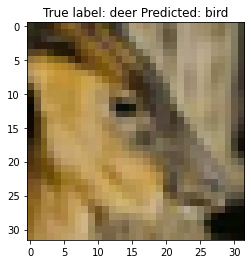

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

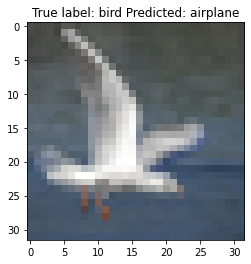

In [18]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

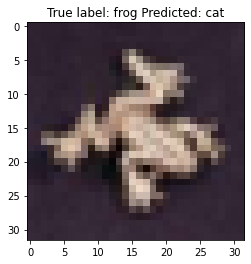

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

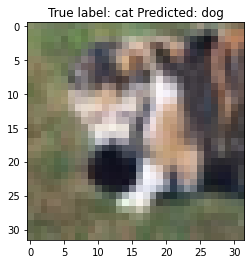

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [21]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0     

**END**